In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot

In [2]:
data = pd.ExcelFile("Data.xlsx")

In [3]:
#Equity data
equity_level = pd.read_excel(data,"Equity_Index").set_index(["Date"])
equity_returns = pd.read_excel(data,"Equity_Returns").set_index(["Date"])

In [4]:
equity_returns

,000001.SS,^AXJO,^BSESN,^FTSE,^GSPC,^HSI,^N225,^STOXX50E
Date,,,,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03,NaN,NaN,NaN,0.000000,-0.811942,NaN,NaN,NaN
2005-01-04,NaN,NaN,-0.422063,0.679231,-1.167136,-1.345184,NaN,NaN
2005-01-05,0.737299,-0.473074,-2.889335,-0.845884,-0.362784,-2.004429,-0.696581,NaN
2005-01-06,-0.999009,-0.235183,-1.415884,0.380770,0.350586,-0.380114,0.478602,NaN
...,...,...,...,...,...,...,...,...
2022-12-26,0.646681,0.000000,1.204995,0.000000,0.000000,0.000000,0.650343,0.000000
2022-12-27,0.978844,0.000000,0.596053,0.000000,-0.404962,0.000000,0.159056,0.416029
2022-12-28,-0.263931,-0.299679,-0.028146,0.323835,-1.202064,1.561010,-0.405965,-0.627981


In [5]:
#FX data
fx_level = pd.read_excel(data,"FX_Index").set_index(["Date"])
fx_returns = pd.read_excel(data,"FX_Returns").set_index(["Date"])

In [6]:
fx_returns

,AUD=X,CHF=X,CNY=X,EUR=X,GBPUSD=X,INR=X,JPY=X,SGD=X
Date,,,,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03,NaN,0.569926,0.000000,0.705377,-0.790406,0.249381,0.224364,0.429077
2005-01-04,NaN,1.795997,0.000000,1.415702,-1.103793,0.172749,1.557328,0.634769
2005-01-05,NaN,-0.059952,0.000000,0.014606,0.101818,0.225333,-0.392942,-0.200150
2005-01-06,NaN,0.608449,0.000000,0.735716,-0.478503,0.548300,0.923698,0.237013
...,...,...,...,...,...,...,...,...
2022-12-26,-0.513806,0.201932,0.081628,-0.604389,0.166785,-0.326755,0.327145,0.022194
2022-12-27,-0.475922,-0.093258,-0.393488,0.259230,0.200234,0.361722,-0.019569,-0.362505
2022-12-28,0.217857,-0.301499,-0.031606,0.028730,-0.470261,-0.152951,0.543811,0.059401


In [7]:
#Commodity data
commodity_level = pd.read_excel(data,"Commodity_Index").set_index(["Date"])
commodity_returns = pd.read_excel(data,"Commodity_Returns").set_index(["Date"])

In [8]:
commodity_level

,WTI,CRUDE,Gold,Natural Gas,Silver
Date,,,,,
2005-01-03,42.16,NaN,428.700012,5.790,6.477000
2005-01-04,43.96,40.75,428.500000,5.902,6.427000
2005-01-05,43.41,41.00,426.600006,5.833,6.512000
2005-01-06,45.51,43.25,421.000000,6.049,6.433000
2005-01-07,45.32,43.28,418.899994,6.001,6.429000
...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,NaN
2022-12-27,79.45,NaN,1814.800049,5.282,24.040001
2022-12-28,78.89,81.70,1807.900024,4.709,23.663000


## Exploring Normality of Log Returns

In [9]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [10]:
scalar = StandardScaler()

### Q-Q plot of a normally distributed data (to compare with our results)

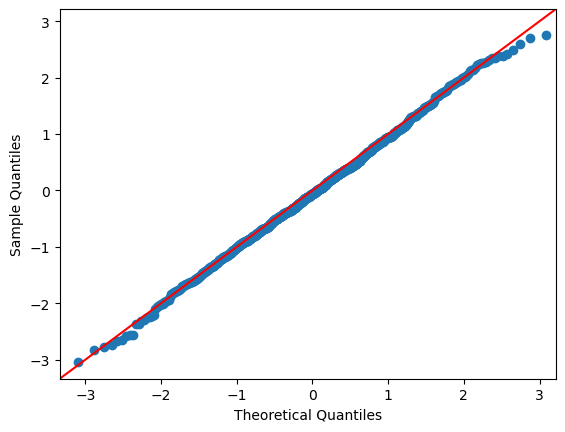

In [11]:
np.random.seed(0)
data = np.random.normal(0,1, 1000)
fig = sm.qqplot(data, line='45')
plt.show()

### Q-Q plot of selected equity indices

In [13]:
scaled_equity_returns = scalar.fit_transform(equity_returns)
scaled_equity_returns = pd.DataFrame(scaled_equity_returns, columns=equity_returns.columns)

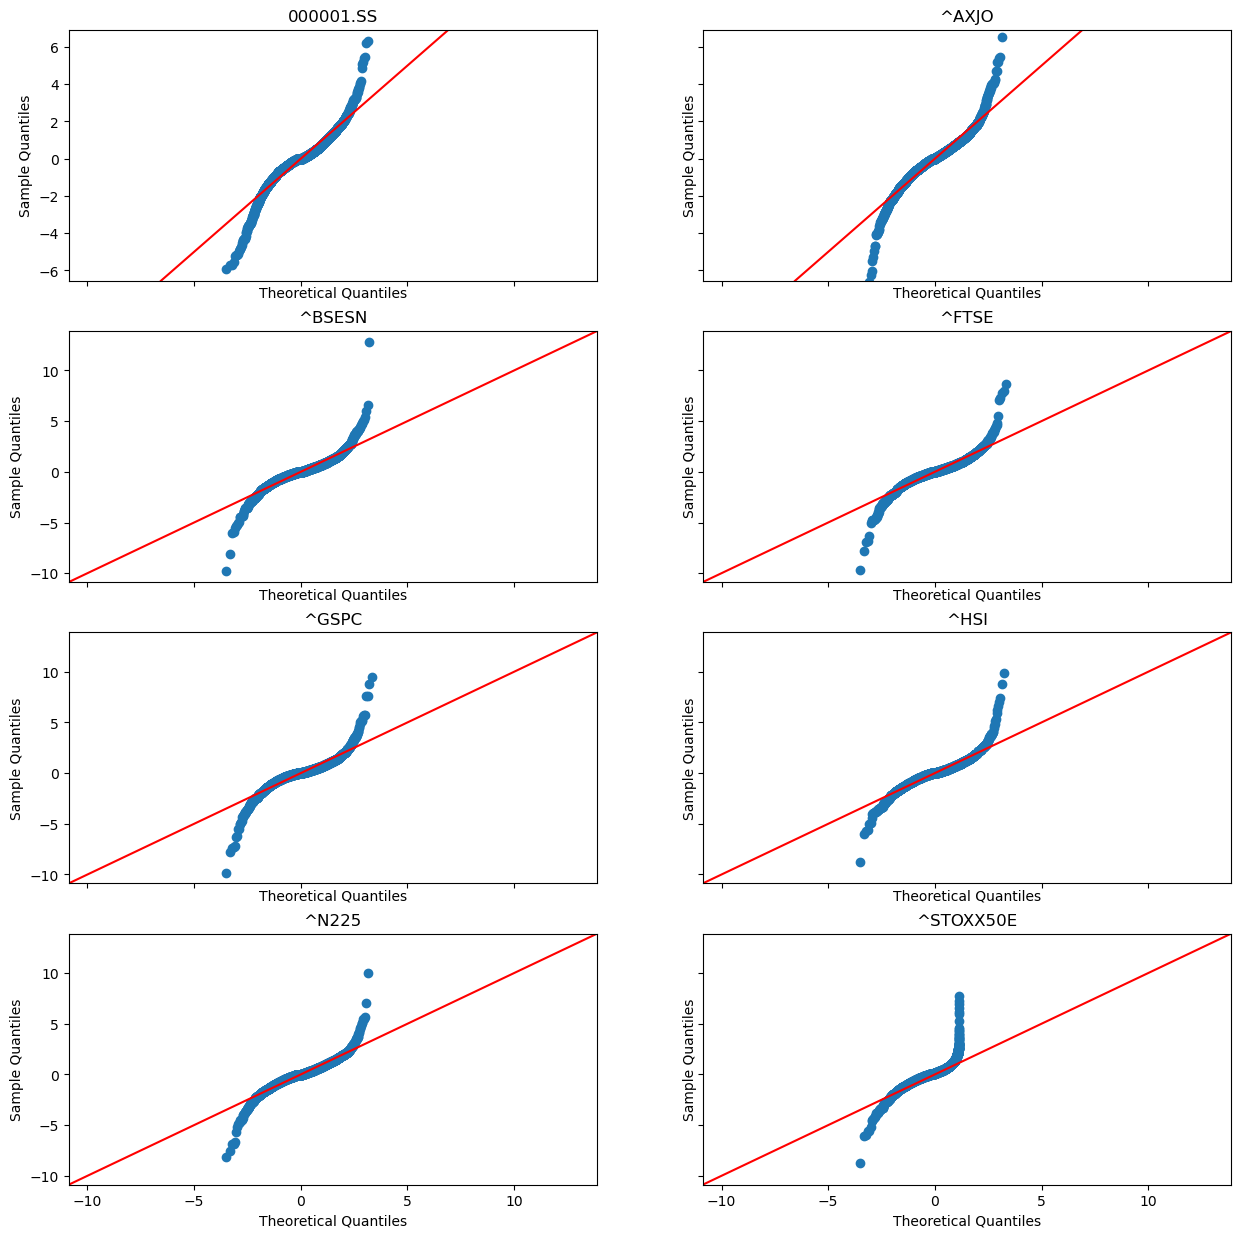

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(15,15), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(scaled_equity_returns.columns)):
    sm.qqplot(scaled_equity_returns.iloc[:,i], line='45',ax=ax[i])
    ax[i].set_title(scaled_equity_returns.columns[i])
    
plt.show() 
    

### Q-Q plot of selected FX Currency Pairs

In [15]:
scaled_fx_returns = scalar.fit_transform(fx_returns)
scaled_fx_returns = pd.DataFrame(scaled_fx_returns, columns=fx_returns.columns)

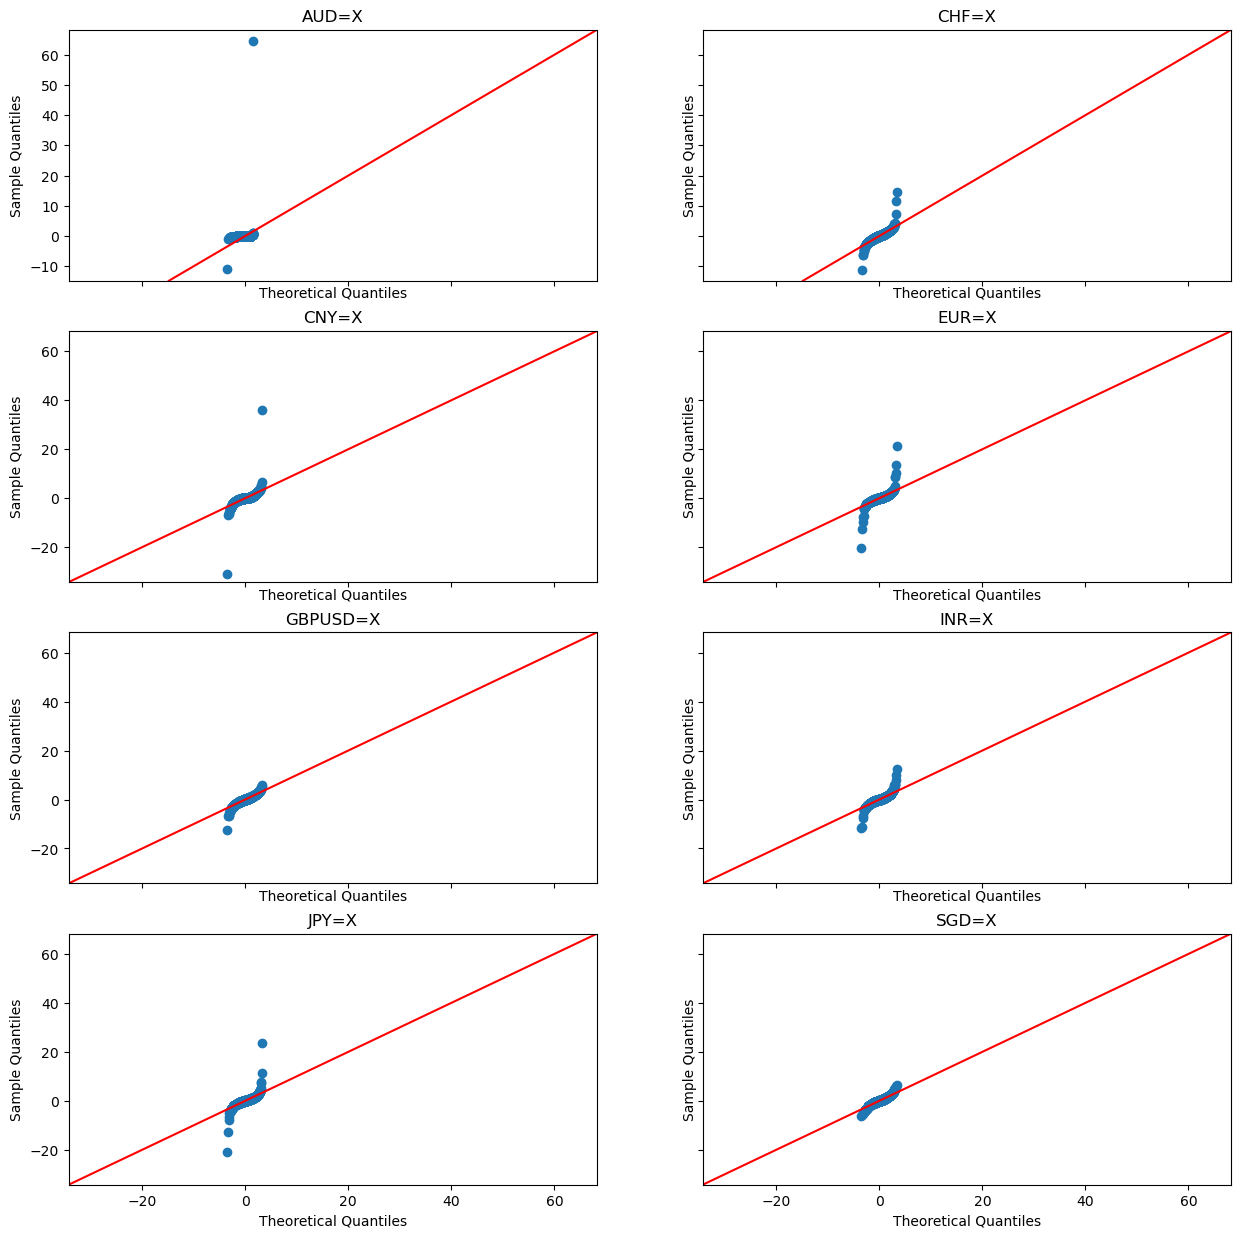

In [16]:
fig, ax = plt.subplots(4, 2, figsize=(15,15), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(scaled_fx_returns.columns)):
    sm.qqplot(scaled_fx_returns.iloc[:,i], line='45',ax=ax[i])
    ax[i].set_title(scaled_fx_returns.columns[i])
    
plt.show() 

### Q-Q plot of selected Commodity Returns

In [29]:
scaled_commodity_returns = scalar.fit_transform(commodity_returns)
scaled_commodity_returns = pd.DataFrame(scaled_commodity_returns, columns=commodity_returns.columns)

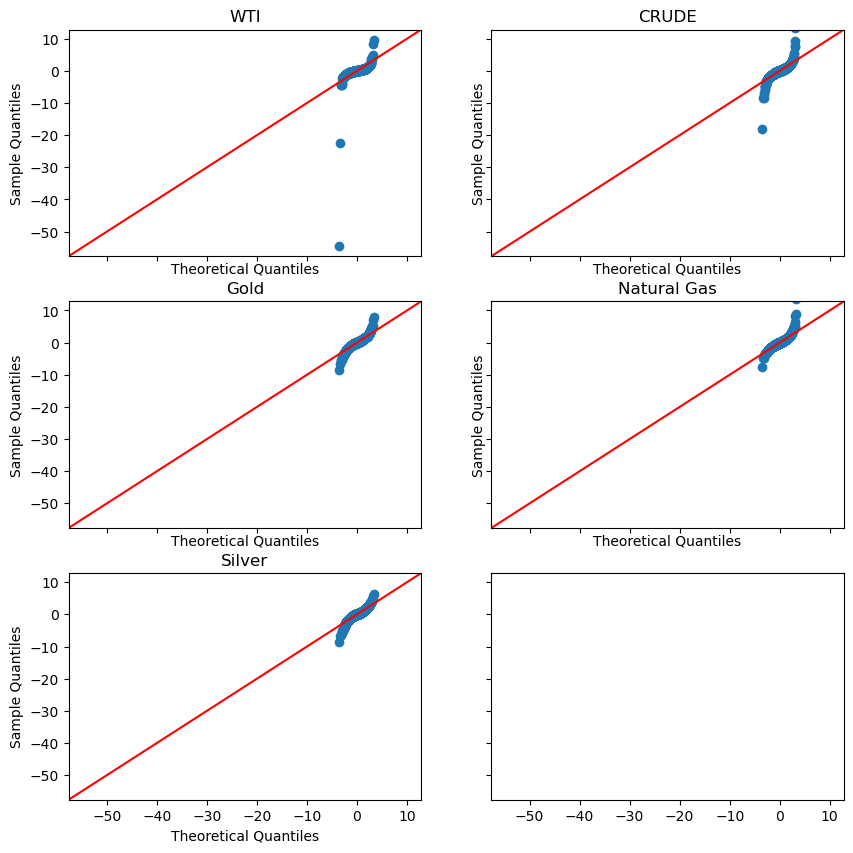

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(10,10), sharex='col', sharey='row')
ax= ax.flatten()


for i in range(len(scaled_commodity_returns.columns)):
    sm.qqplot(scaled_commodity_returns.iloc[:,i], line='45',ax=ax[i])
    ax[i].set_title(scaled_commodity_returns.columns[i])
    
plt.show() 